<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

 Lab 7.2.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [77]:
## Import Libraries
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [41]:
columns = ['Id', 'Clump_thickness', 'Uniformity_cell_size', 'Uniformity_cell_shape', 'Marginal_adhesion', 
                   'Single_e_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']

df = pd.read_csv('breast-cancer-wisconsin.data', names= columns, header = None, usecols = columns[1:],  na_values = '?')




df.head()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [42]:
df.shape

(699, 10)

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_e_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Clump_thickness        699 non-null    int64  
 1   Uniformity_cell_size   699 non-null    int64  
 2   Uniformity_cell_shape  699 non-null    int64  
 3   Marginal_adhesion      699 non-null    int64  
 4   Single_e_cell_size     699 non-null    int64  
 5   Bare_nuclei            683 non-null    float64
 6   Bland_chromatin        699 non-null    int64  
 7   Normal_nucleoli        699 non-null    int64  
 8   Mitoses                699 non-null    int64  
 9   Class                  699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [45]:
#Handling the missing values using SimpleImputer
# Converting the dataFrame to numpy array
values = df.values

# define the criteria for dealing with the missing values
imputer = SimpleImputer( missing_values = np.nan, strategy = 'median')
# Now impute it
imp_data = imputer.fit_transform(values)
imp_data

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]])

In [46]:
data = pd.DataFrame.from_records(imp_data, columns = columns[1:])

data.head()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


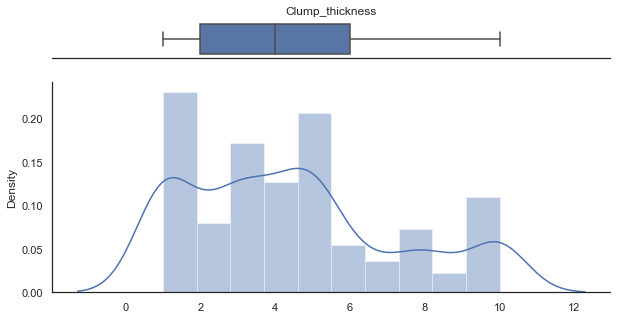

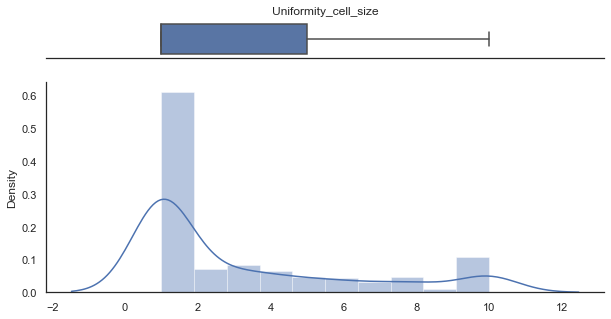

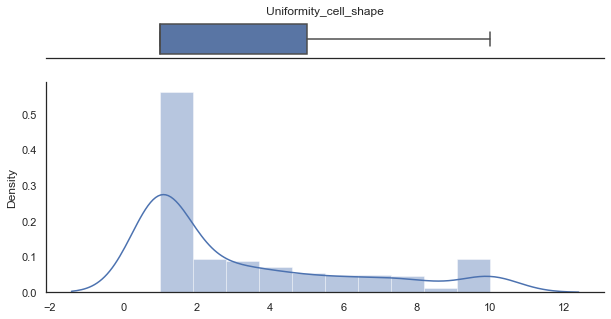

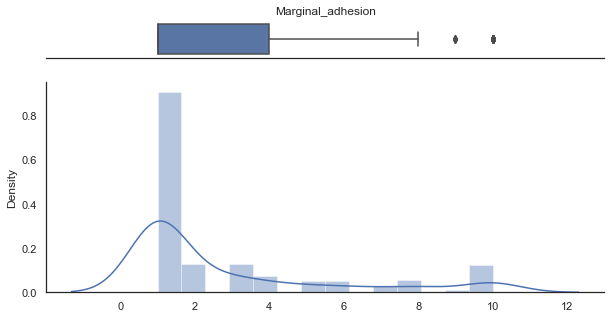

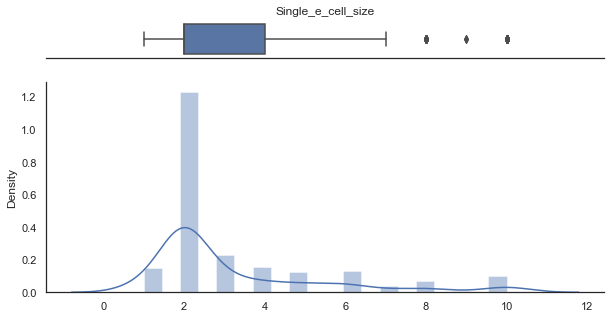

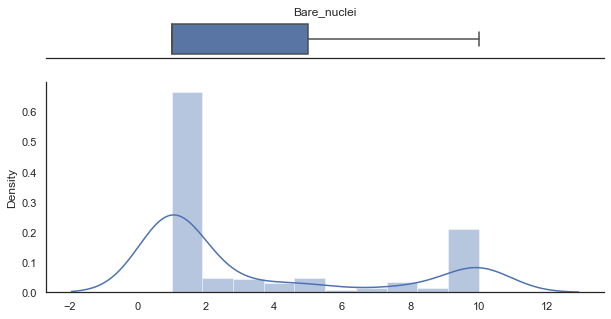

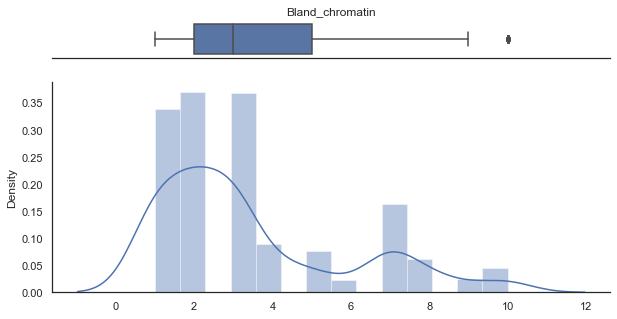

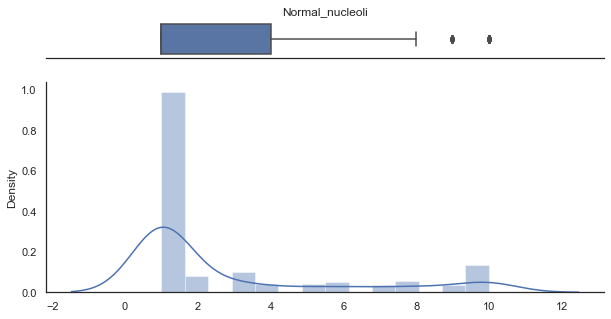

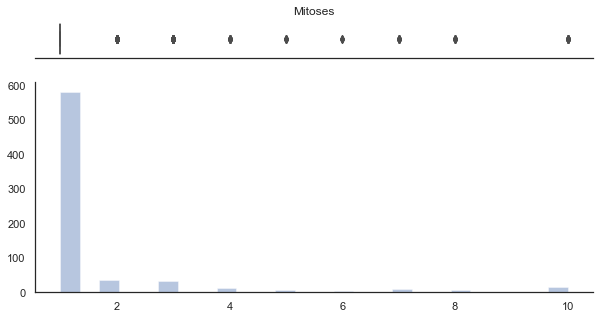

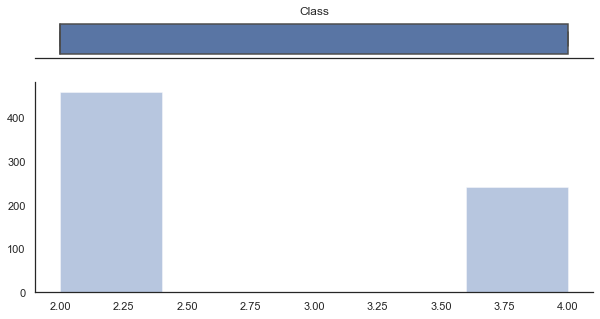

In [48]:
# Check for Outliers
for c in data.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(data[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    

    ax_hist = ax[1]
    if c not in ['Mitoses', 'Class']:
        ax_hist = sns.distplot(data[c], ax = ax_hist)
    else:
        ax_hist = sns.distplot(data[c], ax = ax_hist, kde=False)
    
    ax_hist.set(xlabel = '')
    sns.despine(ax = ax_hist)

plt.show()

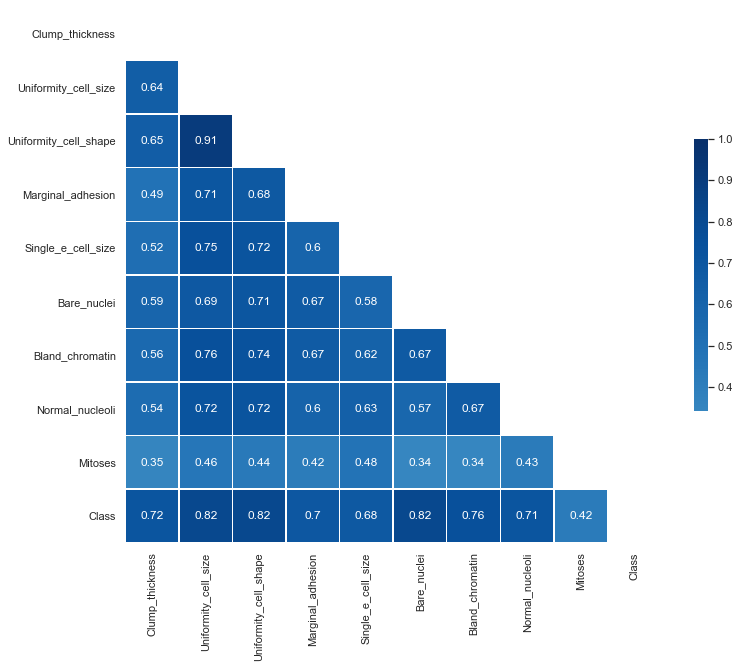

In [49]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = 'Blues'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

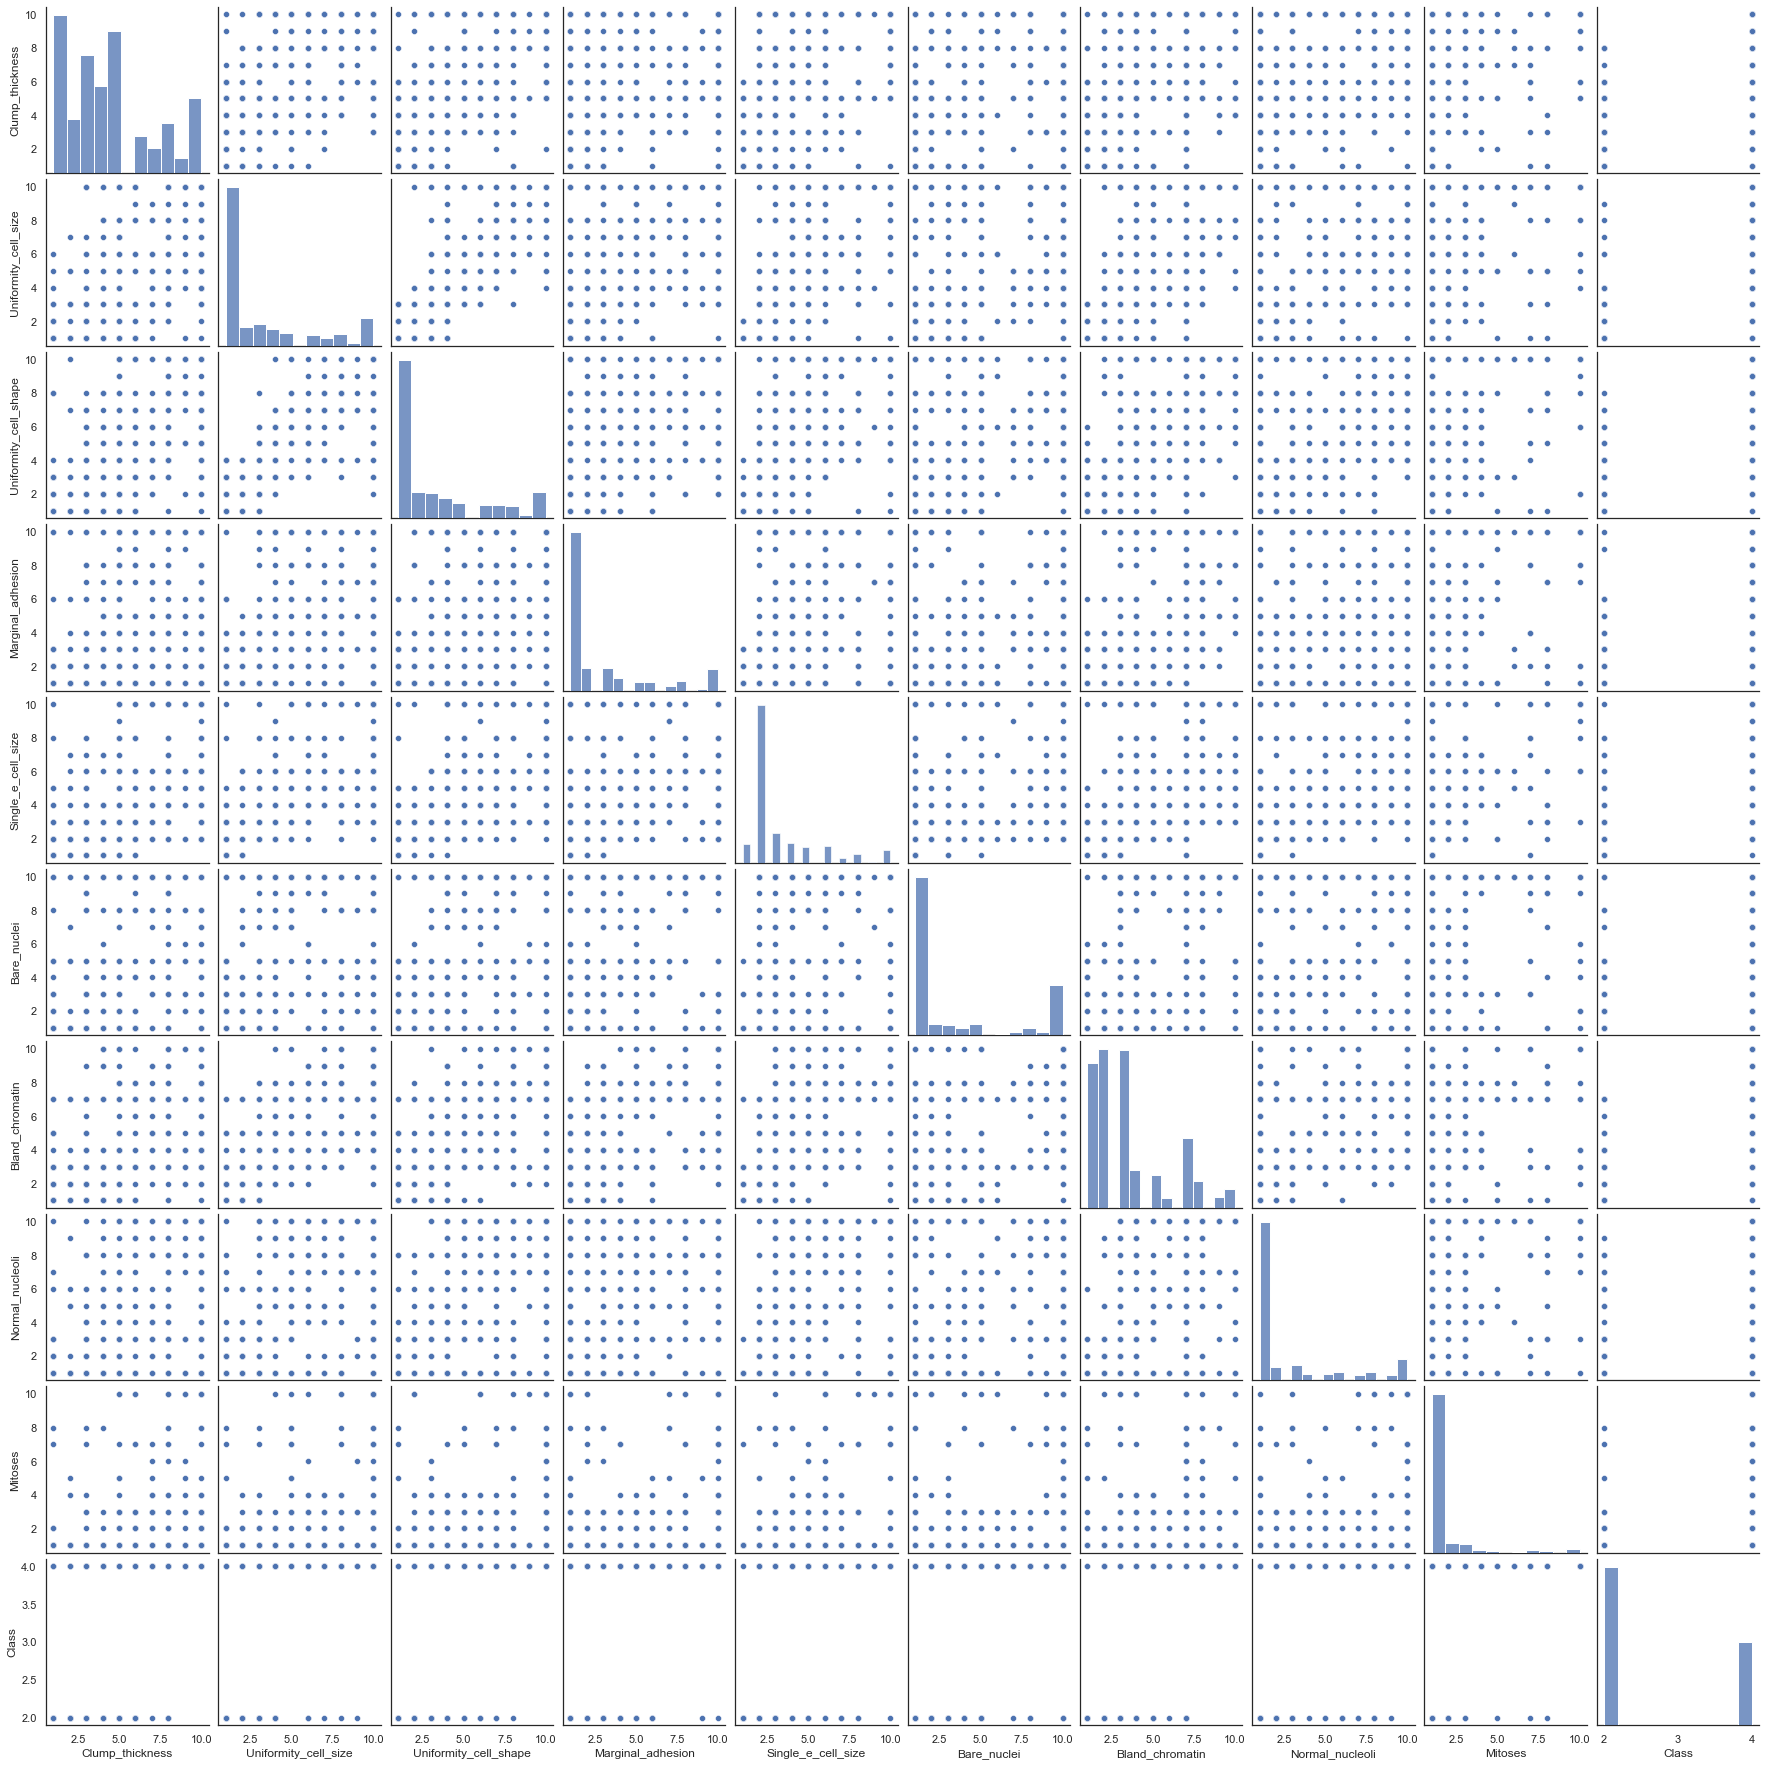

In [50]:
sns.pairplot(data, kind = 'scatter');

In [51]:
# Changing the values of Class from 2 and 4 to 0 and 1
scaler = MinMaxScaler()
data['Class'] = scaler.fit_transform(data['Class'].values.reshape(-1,1))
data['Class'] = data['Class'].astype(np.int8)

In [52]:
data.tail()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,1
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,1
698,4.0,8.0,8.0,5.0,4.0,5.0,10.0,4.0,1.0,1


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [55]:
# Setting out input and output variables
target = 'Class'
features = [i for i in df.columns if i != 'Class']
x = data[features].copy()
y = data[target].copy()


In [56]:
#Splitting dataset into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)


In [57]:
# Scaling the dataset

# Scaling the dataset
scaler = MinMaxScaler(feature_range = (0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [58]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.11111111, 0.        ,
        0.        ],
       [0.55555556, 1.        , 1.        , ..., 0.77777778, 1.        ,
        1.        ],
       [0.22222222, 0.11111111, 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.55555556, 0.22222222, ..., 0.66666667, 0.33333333,
        0.55555556],
       [0.44444444, 0.        , 0.        , ..., 0.11111111, 0.        ,
        0.        ],
       [0.33333333, 0.33333333, 0.11111111, ..., 0.11111111, 0.        ,
        0.11111111]])

In [59]:
x_train = pd.DataFrame.from_records(x_train, columns = columns[1:-1])

In [60]:
x_train.head()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.0,0.0
1,0.555556,1.000000,1.000000,1.000000,1.000000,1.000000,0.777778,1.0,1.0
2,0.222222,0.111111,0.111111,0.222222,0.111111,0.000000,0.000000,0.0,0.0
3,0.444444,0.222222,0.444444,0.444444,0.222222,0.222222,0.333333,1.0,0.0
4,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [61]:
x_test = pd.DataFrame.from_records(x_test, columns = columns[1:-1])

In [62]:
x_test.head()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.0,0.0
2,0.111111,0.000000,0.000000,0.111111,0.222222,0.000000,0.111111,0.0,0.0
3,0.777778,0.666667,0.777778,0.111111,0.333333,0.111111,0.444444,1.0,0.0
4,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.0,0.0


In [63]:
# Handling the imbalance class
from imblearn.combine import SMOTETomek
oversample = SMOTETomek()
x_train, y_train = oversample.fit_resample(x_train, y_train)


In [64]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: Class, dtype: float64

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [67]:
kfold = KFold(n_splits = 10)
dtl = DecisionTreeClassifier()
dtl.fit(x_train, y_train)
results = cross_val_score(dtl, x_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.9513


In [75]:
np.mean(cross_val_score(dtl, x_test, y_test, cv = kfold))

0.9047619047619048

In [73]:
seed = 5
num_trees = 70
kfold = KFold(n_splits = 10)
model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
model.fit(x_train, y_train)
results = cross_val_score(model, x_train, y_train, cv = kfold)
print('AdaBoost, Cross-Validation mean: %.4f' % results.mean())

AdaBoost, Cross-Validation mean: 0.9797


In [74]:
np.mean(cross_val_score(model, x_test, y_test, cv = kfold))

0.9238095238095237

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       318

    accuracy                           1.00       636
   macro avg       1.00      1.00      1.00       636
weighted avg       1.00      1.00      1.00       636



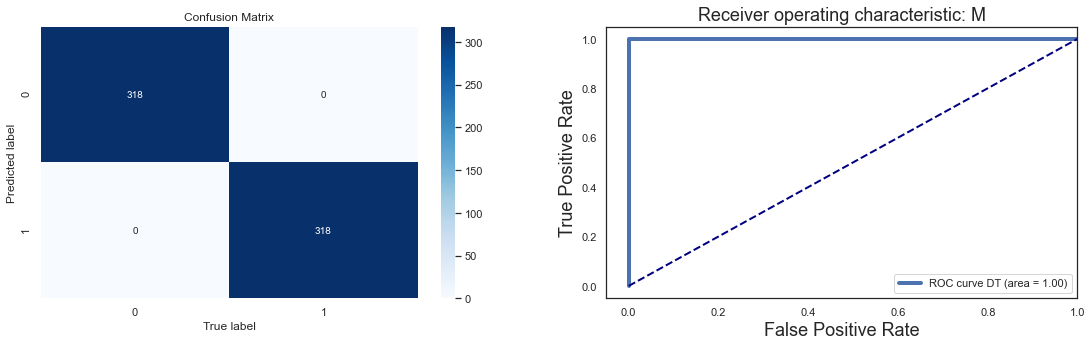

In [78]:
# For DecisionTree Classifier

dtl.fit(x_train,y_train)
y_pred=dtl.predict(x_train)
ac = accuracy_score(y_train,y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))
yhat = dtl.predict_proba(x_train)
probs = yhat[:,1]
fpr, tpr,_ = roc_curve(y_train, probs)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
             
        
        # Confusion matrix
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues', ax = ax[0]);    
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')
        


#ROC Curve
ax[1].plot(fpr, tpr, label='ROC curve DT (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize=18)
ax[1].set_ylabel('True Positive Rate', fontsize=18)
ax[1].set_title('Receiver operating characteristic: M', fontsize=18)
ax[1].legend(loc="lower right")


plt.show()

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       318

    accuracy                           1.00       636
   macro avg       1.00      1.00      1.00       636
weighted avg       1.00      1.00      1.00       636



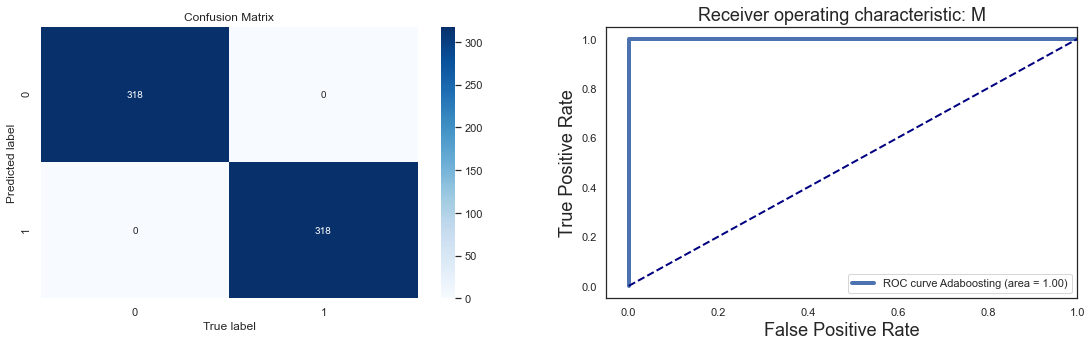

In [80]:
# For Bagging

model.fit(x_train,y_train)
y_pred=model.predict(x_train)
ac = accuracy_score(y_train,y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))
yhat = model.predict_proba(x_train)
probs = yhat[:,1]
fpr, tpr,_ = roc_curve(y_train, probs)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
             
        
        # Confusion matrix
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues', ax = ax[0]);    
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')
        


#ROC Curve
ax[1].plot(fpr, tpr, label='ROC curve Adaboosting (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize=18)
ax[1].set_ylabel('True Positive Rate', fontsize=18)
ax[1].set_title('Receiver operating characteristic: M', fontsize=18)
ax[1].legend(loc="lower right")


plt.show()

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        72

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



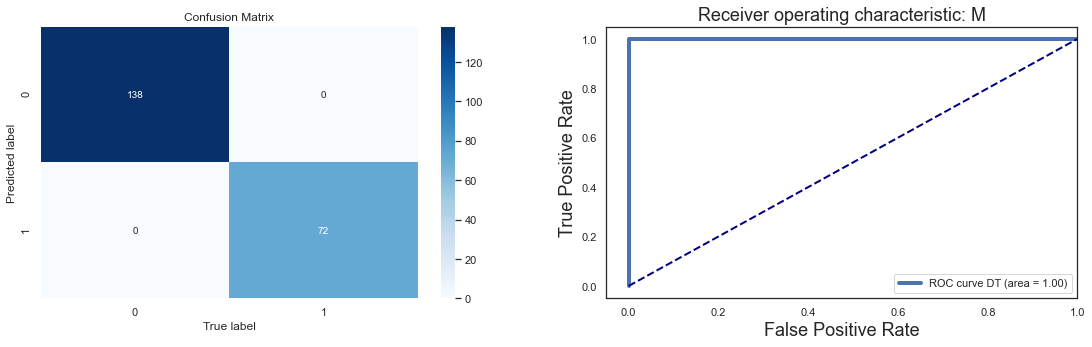

In [81]:
# Evaluate model against test set
# For DecisionTree Classifier

dtl.fit(x_test,y_test)
y_pred=dtl.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

yhat = dtl.predict_proba(x_test)
probs = yhat[:,1]
fpr, tpr,_ = roc_curve(y_test, probs)


fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
             
        
        # Confusion matrix
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues', ax = ax[0]);    
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')
        
         #ROC Curve
ax[1].plot(fpr, tpr, label='ROC curve DT (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize=18)
ax[1].set_ylabel('True Positive Rate', fontsize=18)
ax[1].set_title('Receiver operating characteristic: M', fontsize=18)
ax[1].legend(loc="lower right")


plt.show()

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        72

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



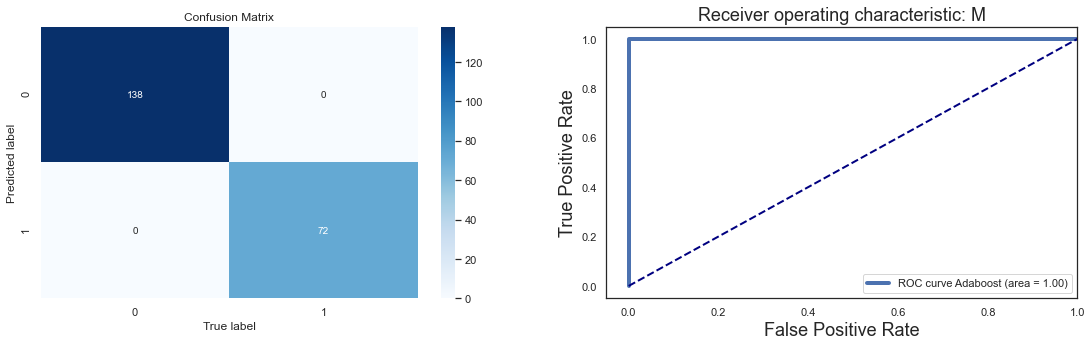

In [82]:
# Evaluate model against test set
#For Bagging


model.fit(x_test,y_test)
y_pred=model.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy = ',ac)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

yhat = model.predict_proba(x_test)
probs = yhat[:,1]
fpr, tpr,_ = roc_curve(y_test, probs)


fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
             
        
        # Confusion matrix
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues', ax = ax[0]);    
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')
        
         #ROC Curve
ax[1].plot(fpr, tpr, label='ROC curve Adaboost (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([-0.05, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize=18)
ax[1].set_ylabel('True Positive Rate', fontsize=18)
ax[1].set_title('Receiver operating characteristic: M', fontsize=18)
ax[1].legend(loc="lower right")


plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [90]:
ans = data.iloc[x_test.index[1]]
for i, c in enumerate(data.columns[:-1]):
    print('%-27s: %d' % (c, int(ans[i])))
print('%-27s: %s' % (data.columns[-1], 'Benign' if ans[-1] == 2 else 'Malignant'))
print('%-27s: %s' % ('Prediction', 'Benign' if y_pred[1] == 0 else 'Malignant'))

Clump_thickness            : 5
Uniformity_cell_size       : 4
Uniformity_cell_shape      : 4
Marginal_adhesion          : 5
Single_e_cell_size         : 7
Bare_nuclei                : 10
Bland_chromatin            : 3
Normal_nucleoli            : 2
Mitoses                    : 1
Class                      : Malignant
Prediction                 : Benign




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



